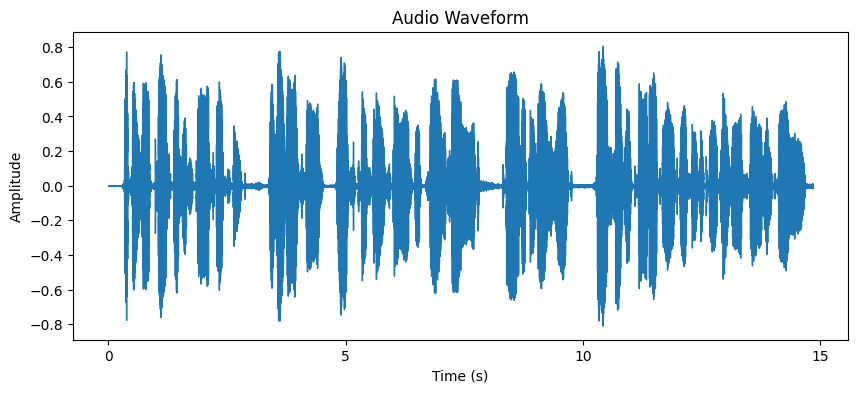

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
audio_path = librosa.example('libri1')  # Load sample file from librosa
y, sr = librosa.load(audio_path, sr=None)

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


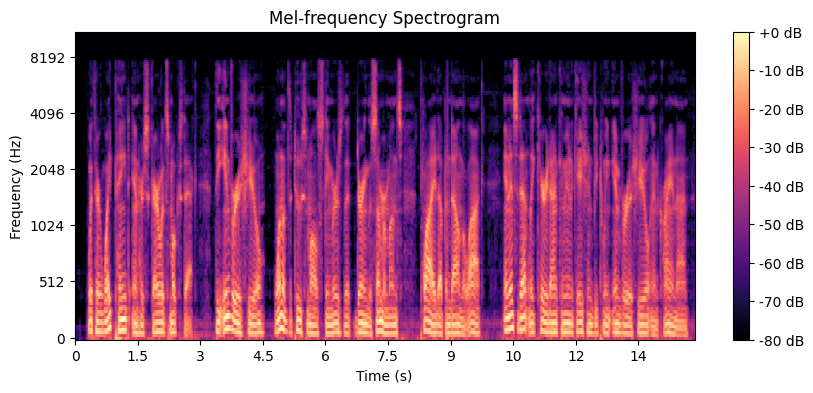

In [ ]:
import numpy as np

# Generate spectrogram
plt.figure(figsize=(10, 4))
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-frequency Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()


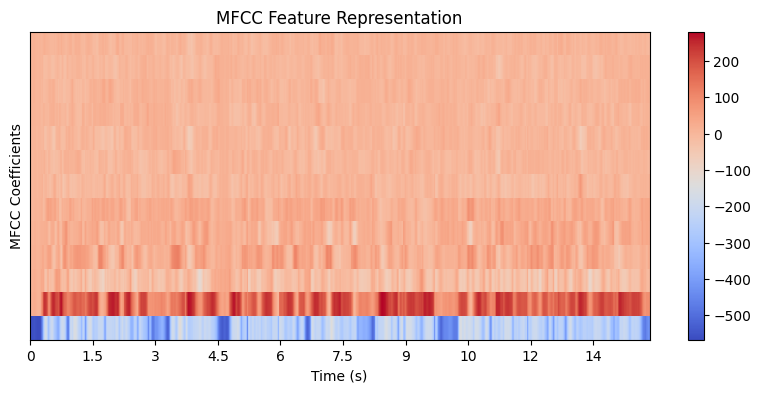

In [ ]:
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title("MFCC Feature Representation")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.show()


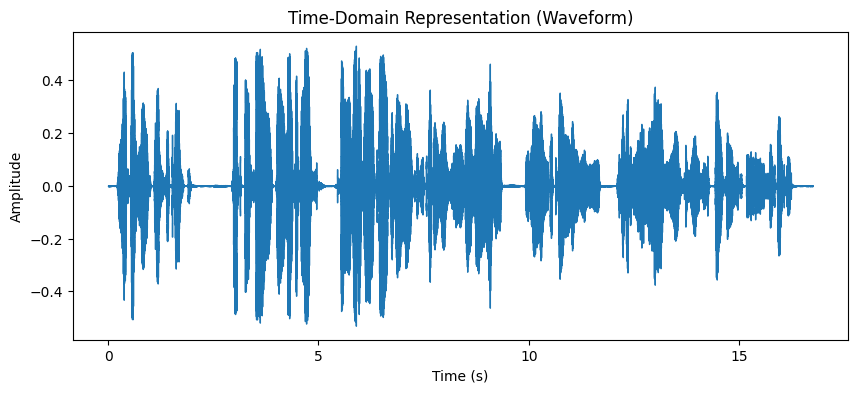

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
audio_path = librosa.example('libri2')  # Load a sample file from librosa
y, sr = librosa.load(audio_path)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Time-Domain Representation (Waveform)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


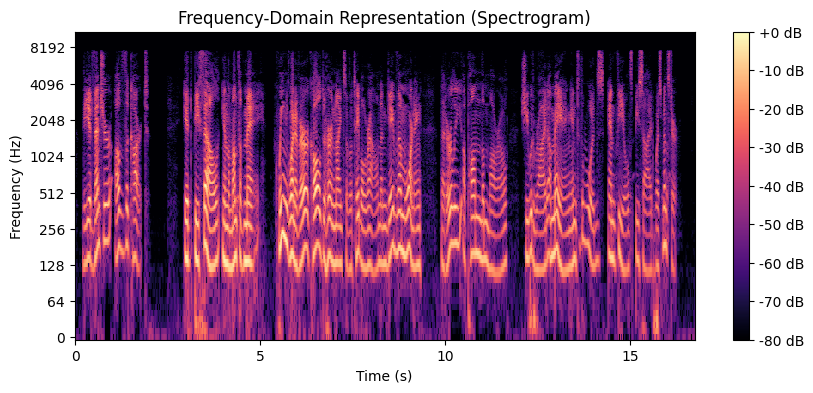

In [ ]:
import numpy as np

# Generate and plot the spectrogram
plt.figure(figsize=(10, 4))
D = np.abs(librosa.stft(y))**2
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Frequency-Domain Representation (Spectrogram)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()


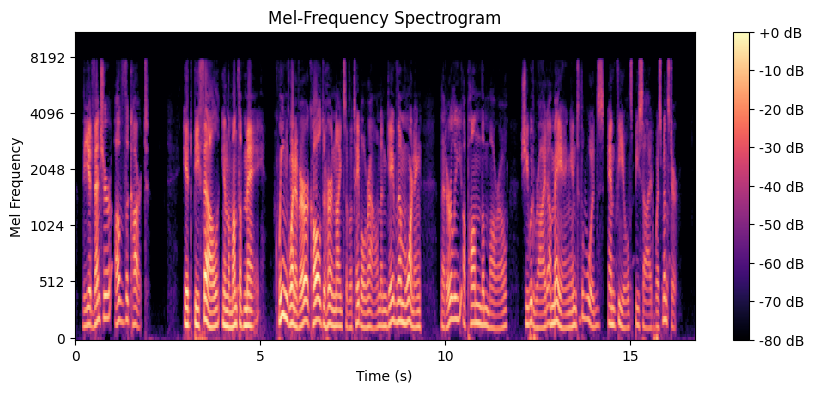

In [ ]:
# Convert to a Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Frequency Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Mel Frequency")
plt.show()


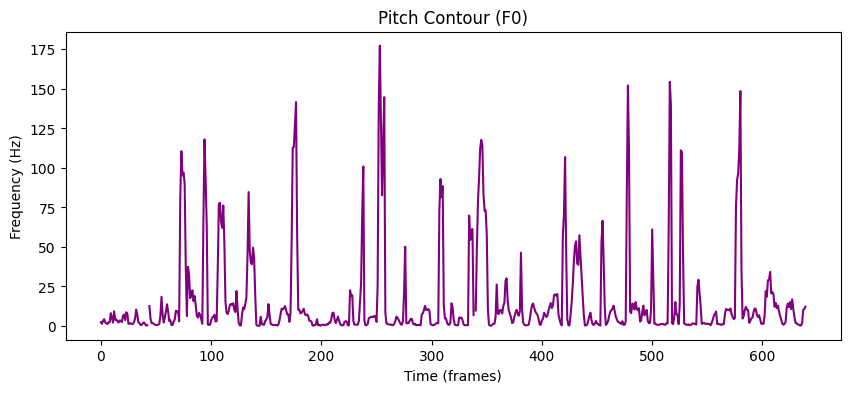

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an example audio file
audio_path = librosa.example('libri1')
y, sr = librosa.load(audio_path)

# Estimate pitch (F0) using librosa's piptrack function
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
pitch = np.mean(pitches, axis=0)

# Filter out zero-pitch values
pitch = [p if p > 0 else np.nan for p in pitch]

# Plot pitch contour
plt.figure(figsize=(10, 4))
plt.plot(pitch, color='purple')
plt.title("Pitch Contour (F0)")
plt.xlabel("Time (frames)")
plt.ylabel("Frequency (Hz)")
plt.show()


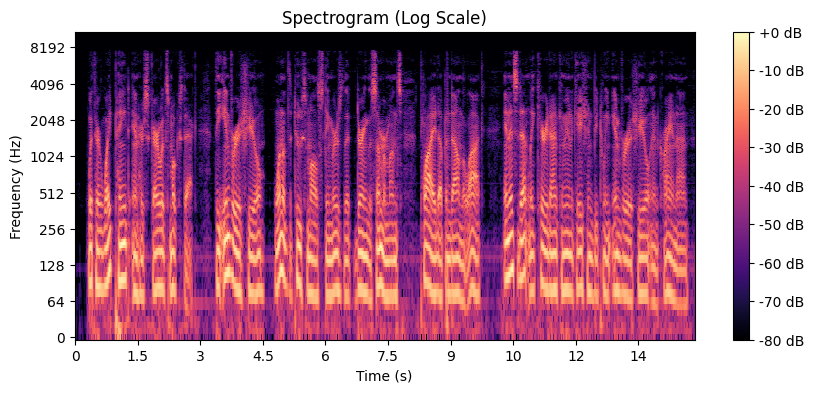

In [ ]:
# Generate and plot a spectrogram
plt.figure(figsize=(10, 4))
D = np.abs(librosa.stft(y))**2
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (Log Scale)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()


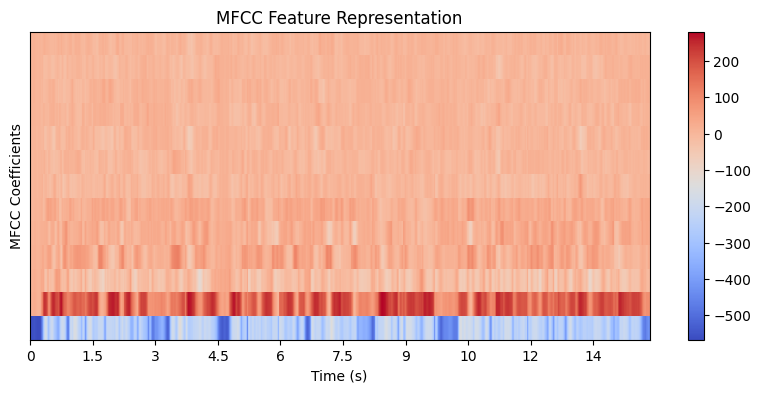

In [ ]:
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title("MFCC Feature Representation")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.show()


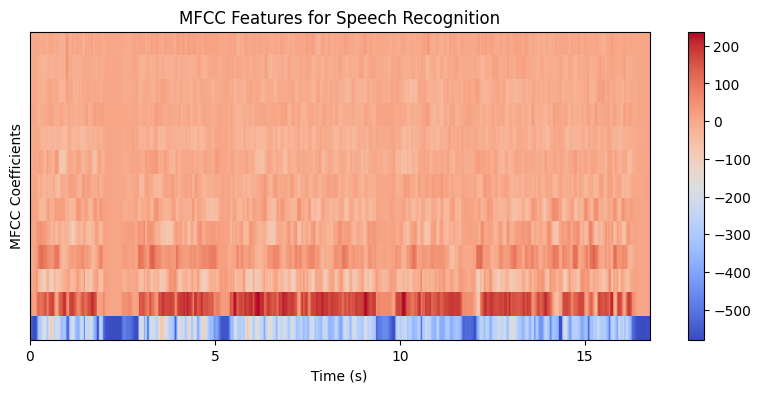

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
audio_path = librosa.example('libri2')
y, sr = librosa.load(audio_path)

# Extract MFCCs for speech recognition
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title("MFCC Features for Speech Recognition")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.show()


In [ ]:
pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 16.9 MB/s eta 0:00:00


In [ ]:
import speech_recognition as sr

# Initialize recognizer
recognizer = sr.Recognizer()

# Load an audio file
audio_path = librosa.example('libri2')
#audio_path = "/content/Alan Walker Baby Don't Go feat Kelly Clarkson Official Video.mp3"  # Replace with path to your audio file
with sr.AudioFile(audio_path) as source:
    audio_data = recognizer.record(source)

# Recognize speech
try:
    text = recognizer.recognize_google(audio_data)
    print("Recognized Text:", text)
except sr.UnknownValueError:
    print("Could not understand the audio")
except sr.RequestError:
    print("Could not request results; check your network connection")


ValueError: Audio file could not be read as PCM WAV, AIFF/AIFF-C, or Native FLAC; check if file is corrupted or in another format

In [ ]:
!pip install pydub
import speech_recognition as sr
import librosa
from pydub import AudioSegment

# Initialize recognizer
recognizer = sr.Recognizer()

# Load an audio file
audio_path = librosa.example('libri2')

# Convert audio to WAV using pydub
audio = AudioSegment.from_file(audio_path)  # Load using pydub
audio.export("temp_audio.wav", format="wav")  # Export as WAV

# Process the temporary WAV file
with sr.AudioFile("temp_audio.wav") as source:
    audio_data = recognizer.record(source)

# Recognize speech
try:
    text = recognizer.recognize_google(audio_data)
    print("Recognized Text:", text)
except sr.UnknownValueError:
    print("Could not understand the audio")
except sr.RequestError:
    print("Could not request results; check your network connection")

Recognized Text: the adventure of the cart it be fell in the month of May Queen Guinevere called her Knights of a table round and gave them warning that early upon the morrow she would ride a man into the woods and Fields beside Westminster


In [ ]:
pip install gtts

In [ ]:
from gtts import gTTS
import IPython.display as ipd

# Text for synthesis
text = "Hello, this is an example of speech synthesis using Python."

# Convert text to speech
tts = gTTS(text=text, lang='en')
tts.save("synthesized_speech.mp3")

# Play audio
ipd.Audio("synthesized_speech.mp3")


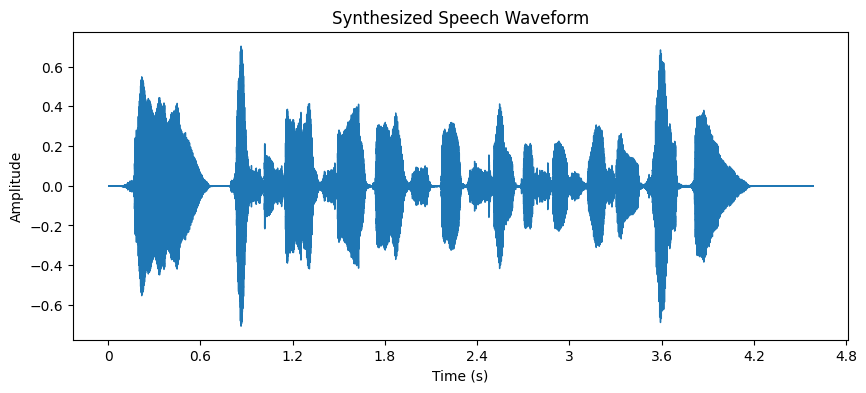

In [ ]:
# Load synthesized speech
synthesized_y, synthesized_sr = librosa.load("synthesized_speech.mp3")

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(synthesized_y, sr=synthesized_sr)
plt.title("Synthesized Speech Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


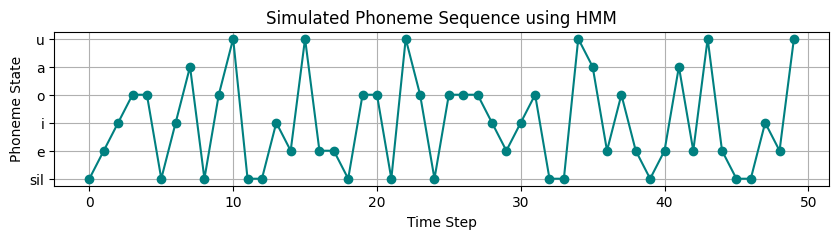

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate phoneme sequence using Hidden Markov Model
states = ['sil', 'a', 'e', 'i', 'o', 'u', 'sil']  # silence and vowels as example states
state_sequence = np.random.choice(states, size=50)  # Simulated phoneme sequence

# Visualize the state sequence
plt.figure(figsize=(10, 2))
plt.plot(state_sequence, 'o-', color='teal')
plt.title("Simulated Phoneme Sequence using HMM")
plt.xlabel("Time Step")
plt.ylabel("Phoneme State")
plt.grid(True)
plt.show()


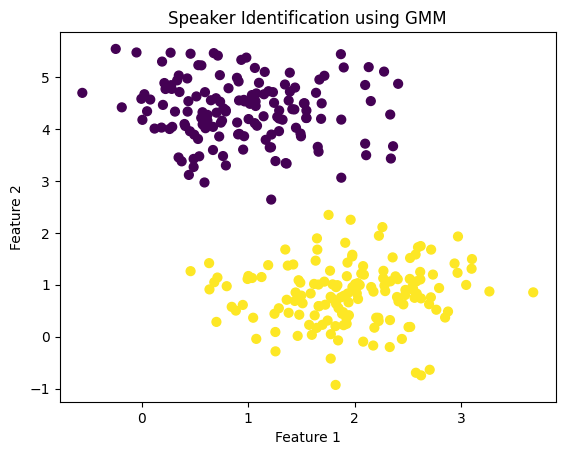

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate synthetic data for speaker clusters
X, y_true = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)

# Fit GMM
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)
labels = gmm.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.title("Speaker Identification using GMM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


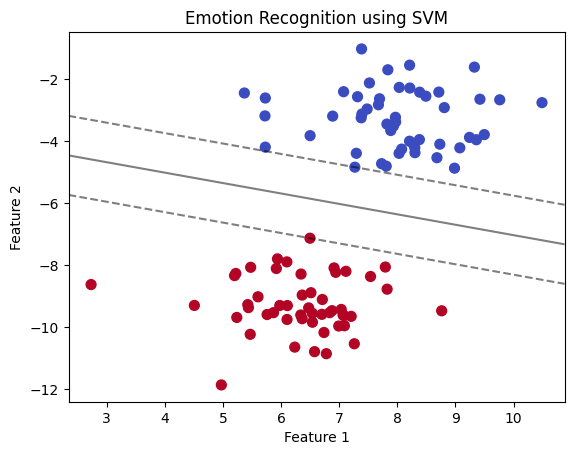

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC

# Load dataset and train SVM
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)
svm = SVC(kernel='linear')
svm.fit(X, y)

# Plot decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title("Emotion Recognition using SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


TypeError: list indices must be integers or slices, not str

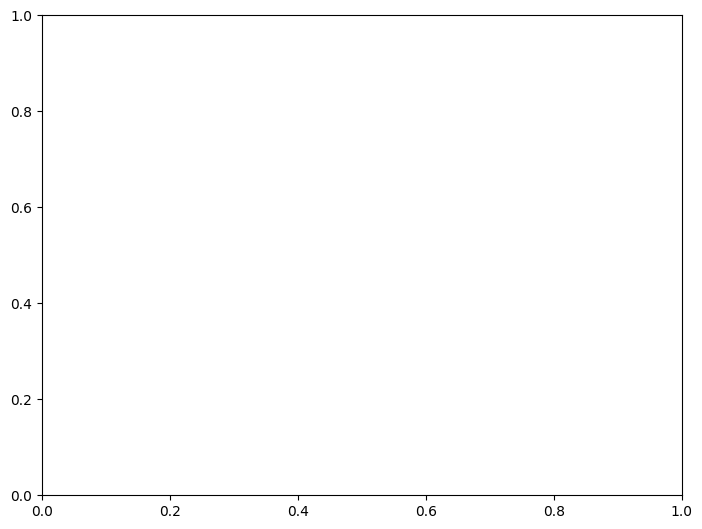

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define a neural network structure
G = nx.DiGraph()
layers = ['Input\n(MFCCs)', 'Hidden Layer 1\n(Convolution)', 'Hidden Layer 2\n(ReLU)', 'Hidden Layer 3\n(LSTM)', 'Output\n(Classifier)']
positions = [(i, 0) for i in range(len(layers))]

# Add nodes and edges
for i, layer in enumerate(layers):
    G.add_node(layer, pos=positions[i])
for i in range(len(layers) - 1):
    G.add_edge(layers[i], layers[i + 1])

# Plot neural network structure
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos=positions, with_labels=True, node_size=3000, node_color="lightblue", font_size=10)
plt.title("Neural Network Architecture for Speech Recognition")
plt.show()


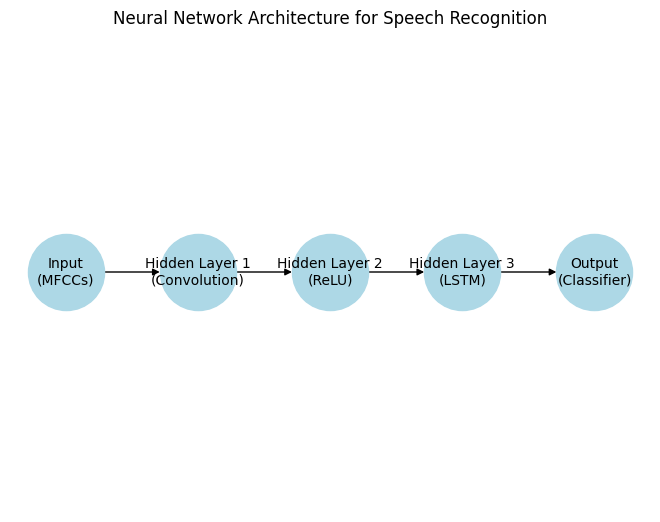

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define a neural network structure
G = nx.DiGraph()
layers = ['Input\n(MFCCs)', 'Hidden Layer 1\n(Convolution)', 'Hidden Layer 2\n(ReLU)', 'Hidden Layer 3\n(LSTM)', 'Output\n(Classifier)']

# Create a dictionary to store node positions
# Key: Node name (string)
# Value: Position (tuple)
positions = {layer: (i, 0) for i, layer in enumerate(layers)}

# Add nodes and edges
for i, layer in enumerate(layers):
    G.add_node(layer, pos=positions[layer])  # Use dictionary to access positions
for i in range(len(layers) - 1):
    G.add_edge(layers[i], layers[i + 1])

# Plot neural network structure
# pos = nx.spring_layout(G, seed=42)  # No longer needed as positions are pre-defined
nx.draw(G, pos=positions, with_labels=True, node_size=3000, node_color="lightblue", font_size=10)
plt.title("Neural Network Architecture for Speech Recognition")
plt.show()